In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
import warnings  
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR


In [2]:
df=pd.read_csv("advertising.csv")
df # importing dataset in datafeame

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
#pp.ProfileReport(df)

In [4]:
df.isnull().sum() #to check any null values present or not

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [24]:
df.drop(['Unnamed: 0'], inplace=True, axis = 1)


In [25]:
x=df.iloc[:,:-1]
x #spliting x & y

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [26]:
y=df['sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [27]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)     

In [28]:
#step 1:import the module
from sklearn.linear_model import LinearRegression

#step 2: initialize the model
lr=LinearRegression()

#step 3: train the model

lr.fit(xtrain,ytrain)   

#step 4: make prediction
ypred=lr.predict(xtest)

In [29]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2_score(ytest,ypred) 

0.9156213613792231

In [30]:
#as can be seen we get good r2score abt 90%

In [31]:
mean_absolute_error(ytest,ypred)

1.0668917082595215

In [32]:
mean_squared_error(ytest,ypred)

1.9730456202283397

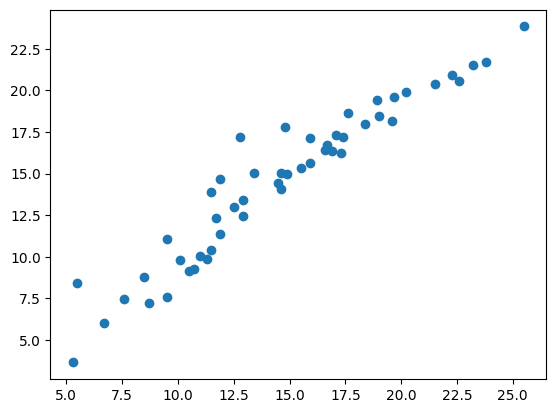

In [33]:
plt.scatter(ytest,ypred)

In [34]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [35]:
lr.coef_

array([0.04656457, 0.17915812, 0.00345046])

In [36]:
#applyng other regression model
def random(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    print(accuracy_score(ytest,ypred))

In [37]:
Tv=int(input('Enter Tv Value'))  #prediction from user entered input
Radio=int(input('enter RAdio value'))
Newspaper=int(input('enter nw value'))

res=lr.predict([[Tv,Radio,Newspaper]])

print('Sales of user entered input is:',res)

Enter Tv Value 23
enter RAdio value 23
enter nw value 3


Sales of user entered input is: [8.07893989]
